In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
from tensorflow import keras
import os
#os.chdir(r"/content/drive/My Drive")
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import warnings
warnings.filterwarnings('ignore')


In [2]:
#store data label in the list
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path =os.getcwd()

In [3]:
cur_path

'C:\\Users\\91770\\project'

In [4]:
path2=os.path.join(cur_path, 'Test')
for i in range(classes):
    path =os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)  
    for a in images:
      try:
        image = Image.open(path +'\\'+ a)
        image = image.resize((30,30))
        image = np.array(image)
        data.append(image)
        labels.append(i)
      except:
        print("Error loading image")

In [5]:
data=np.array(data)
labels=np.array(labels)

In [7]:
#save labels and model for future use
# os.mkdir('training')

np.save('./training/data',data)
np.save('./training/target',labels)

In [8]:
#load data and label
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [9]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [11]:
#convert label into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [12]:
#build the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [13]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
epochs = 27  #20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/27
981/981 [==============================] - 45s 44ms/step - loss: 2.1447 - accuracy: 0.4615 - val_loss: 0.6762 - val_accuracy: 0.8347
Epoch 2/27
981/981 [==============================] - 42s 43ms/step - loss: 0.9353 - accuracy: 0.7202 - val_loss: 0.3969 - val_accuracy: 0.8877
Epoch 3/27
981/981 [==============================] - 42s 42ms/step - loss: 0.7301 - accuracy: 0.7789 - val_loss: 0.3150 - val_accuracy: 0.9101
Epoch 4/27
981/981 [==============================] - 42s 42ms/step - loss: 0.6197 - accuracy: 0.8128 - val_loss: 0.3100 - val_accuracy: 0.9146
Epoch 5/27
981/981 [==============================] - 42s 43ms/step - loss: 0.5132 - accuracy: 0.8445 - val_loss: 0.1999 - val_accuracy: 0.9459
Epoch 6/27
981/981 [==============================] - 42s 43ms/step - loss: 0.4228 - accuracy: 0.8715 - val_loss: 0.1679 - val_accuracy: 0.9504
Epoch 7/27
981/981 [==============================] - 42s 43ms/step - loss: 0.3825 - accuracy: 0.8859 - val_loss: 0.1820 - val_accuracy:

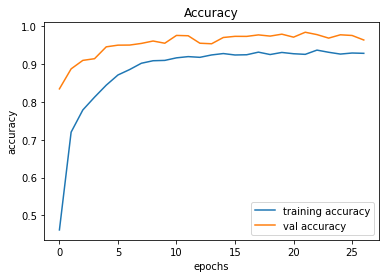

In [15]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

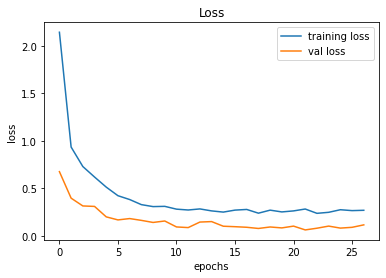

In [16]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
# testing on test data
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [25]:
X_test, label = testing('Test.csv')

In [35]:
Y_pred = np.argmax(model.predict(X_test),axis=1)
Y_pred

395/395 [==============================] - 4s 10ms/step


array([16,  1, 38, ..., 28,  7, 10], dtype=int64)

In [36]:
#accuracy with test data
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9145684877276327


In [37]:
#save the model
model.save("./training/TSR.h5")

In [39]:
#load the model
import os
os.chdir(r'C:\Users\91770\project')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [40]:
#classes of traffic sign
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [45]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = np.argmax(model.predict(X_test),axis=1)
    return image,Y_pred

1/1 [==============================] - 0s 23ms/step
Predicted traffic sign is:  Bumpy road


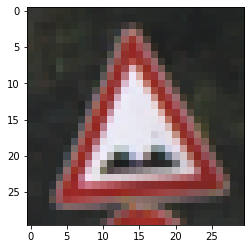

In [47]:
plot,prediction = test_on_img(r'C:\Users\91770\project\Test\00500.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()